This notebook reproduces figures 4 and 5 from Yu et al. (2019). To run this, you'll need the output from `find_incorrect.py` (a list of true dispositions and predictions for all TCEs in the test set) for both the triage and vetting models. You can find some examples in the `sample_output` folder.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import matplotlib as mpl

plt.rc('font', family='serif')
%matplotlib inline

In [5]:
y_true_plain, y_pred_plain = np.loadtxt('sample_output/true_vs_pred_plain.txt', unpack=True)
y_true_dc, y_pred_dc = np.loadtxt('sample_output/true_vs_pred_dc.txt', unpack=True)
y_true_se, y_pred_se = np.loadtxt('sample_output/true_vs_pred_se.txt', unpack=True)
y_true_dc_se, y_pred_dc_se = np.loadtxt('sample_output/true_vs_pred_dc_se.txt', unpack=True)
y_true_triage, y_pred_triage = np.loadtxt('sample_output/true_vs_pred_triage.txt', unpack=True)

In [6]:
# Calculate precision and recall for various thresholds
p_plain, r_plain, _ = precision_recall_curve(y_true_plain, y_pred_plain)
p_dc, r_dc, _ = precision_recall_curve(y_true_dc, y_pred_dc)
p_se, r_se, _ = precision_recall_curve(y_true_se, y_pred_se)
p_dc_se, r_dc_se, _ = precision_recall_curve(y_true_dc_se, y_pred_dc_se)
p_triage, r_triage, _ = precision_recall_curve(y_true_triage, y_pred_triage)

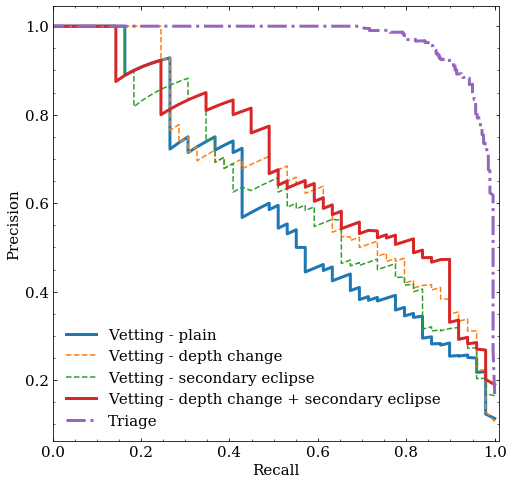

In [7]:
# Figure 4
fig = plt.figure(figsize=(8,8))
ax1 = plt.subplot(111)
ax1.minorticks_on()
ax1.tick_params(top=True, right=True, which='both', direction='in')
plt.gca().xaxis.set_tick_params(labelsize=15)
plt.gca().yaxis.set_tick_params(labelsize=15)
plt.plot(r_plain, p_plain, label='Vetting - plain', lw=3)
plt.plot(r_dc, p_dc, label='Vetting - depth change', ls='--')
plt.plot(r_se, p_se, label='Vetting - secondary eclipse', ls='--')
plt.plot(r_dc_se, p_dc_se, label='Vetting - depth change + secondary eclipse', lw=3)
plt.plot(r_triage, p_triage, label='Triage', lw=3, ls='-.')
plt.ylabel('Precision', fontsize=15)
plt.xlabel('Recall', fontsize=15)
plt.xlim(0, 1.01)
plt.legend(fontsize=15, frameon=False)

In [11]:
nbins = 21
bins = np.linspace(0, 1, nbins)
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)

hist, bin_edges = np.histogram(y_pred_triage, bins)
hist_v, bin_edges_v = np.histogram(y_pred_dc_se, bins)

In [14]:
# calculate fraction of positives in each prediction bin for triage and vetting
pc_frac = []
pc_frac_v = []
for i in range(nbins-1):
	in_bin = np.where((y_pred_triage >= bin_edges[i]) & (y_pred_triage < bin_edges[i+1]))
	pc_in_bin = np.where(y_true_triage[in_bin] == 1)[0]
	pc_frac.append(len(pc_in_bin) / float(hist[i]))

	in_bin = np.where((y_pred_dc_se >= bin_edges[i]) & (y_pred_dc_se < bin_edges[i+1]))
	pc_in_bin = np.where(y_true_dc_se[in_bin] == 1)[0]
	try:
		pc_frac_v.append(len(pc_in_bin) / float(hist_v[i]))
	except ZeroDivisionError:
		pc_frac_v.append(0)

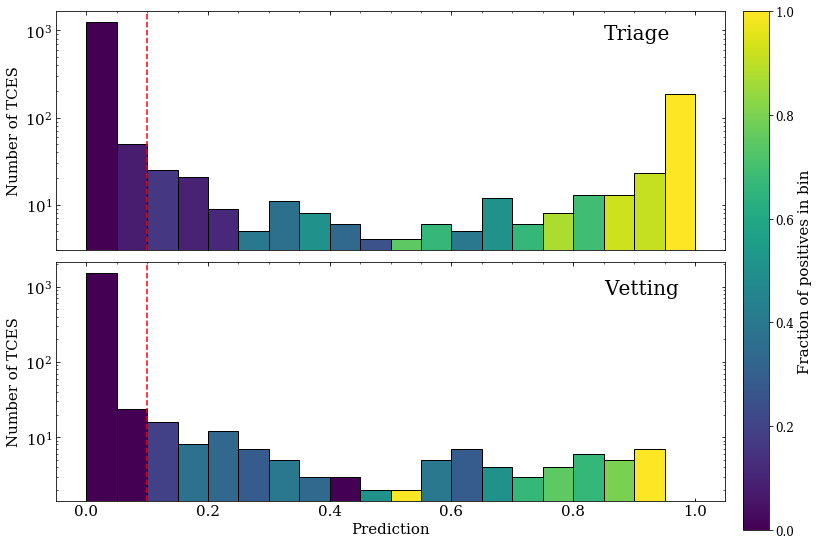

In [15]:
# Figure 5
colors = cmap(pc_frac)
colors_v = cmap(pc_frac_v)
fig, (ax, ax2) = plt.subplots(2, 1, sharex='col', figsize=(12,9))
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.minorticks_on()
ax.tick_params(top=True, right=True, which='both', direction='in')
ax1 = fig.add_axes([0.92, 0.08, 0.03, 0.8])
ax.set_ylabel('Number of TCES', fontsize=15)
width = bin_edges[1]
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap, norm=norm)
ax.bar(bin_edges[:-1]+width/2, hist, width=width, color=colors, linewidth=1, edgecolor='k')
ax.set_yscale('log')
ax.axvline(0.1, ls='--', color='r')
ax.text(0.85, 800, 'Triage', fontsize=20)

ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.minorticks_on()
ax2.tick_params(top=True, right=True, which='both', direction='in')
ax2.bar(bin_edges_v[:-1]+width/2, hist_v, width=width, color=colors_v, linewidth=1, edgecolor='k')
ax2.set_yscale('log')
ax2.text(0.85, 800, 'Vetting', fontsize=20)
ax2.axvline(0.1, ls='--', color='r')

ax2.set_xlabel('Prediction', fontsize=15)
ax2.set_ylabel('Number of TCES', fontsize=15)
cb1.ax.set_ylabel('Fraction of positives in bin', fontsize=15)
cb1.ax.tick_params(labelsize=12)

plt.subplots_adjust(hspace=0.05)